In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
cardio=pd.read_excel('Book1.xlsx')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
cr=cardio.drop('age',axis=1)

In [4]:
co=cardio['age']

In [5]:
co.head()

0    22469
1    14648
2    21901
3    14549
4    23393
Name: age, dtype: int64

In [6]:
cr.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,1,155,69.0,130,80,2,2,0,0,1,0
1,989,1,163,71.0,110,70,1,1,0,0,1,1
2,990,1,165,70.0,120,80,1,1,0,0,1,0
3,991,2,165,85.0,120,80,1,1,1,1,1,0
4,992,1,155,62.0,120,80,1,1,0,0,1,0


In [7]:
c=co//365

In [8]:
c.head()

0    61
1    40
2    60
3    39
4    64
Name: age, dtype: int64

In [9]:
conc=pd.concat([cr,c],axis=1)

In [10]:
conc.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
0,988,1,155,69.0,130,80,2,2,0,0,1,0,61
1,989,1,163,71.0,110,70,1,1,0,0,1,1,40
2,990,1,165,70.0,120,80,1,1,0,0,1,0,60
3,991,2,165,85.0,120,80,1,1,1,1,1,0,39
4,992,1,155,62.0,120,80,1,1,0,0,1,0,64


In [11]:
conc.shape

(69301, 13)

In [12]:
conc.tail()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
69296,99993,2,168,76.0,120,80,1,1,1,0,1,0,52
69297,99995,1,158,126.0,140,90,2,2,0,0,1,1,61
69298,99996,2,183,105.0,180,90,3,1,0,1,0,1,52
69299,99998,1,163,72.0,135,80,1,2,0,0,0,1,61
69300,99999,1,170,72.0,120,80,2,1,0,0,1,0,56


In [13]:
conc.dtypes

id               int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age              int64
dtype: object

In [14]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
 12  age          69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [15]:
conc.keys()

Index(['id', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age'],
      dtype='object')

In [16]:
conc.isnull().sum()

id             0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age            0
dtype: int64

In [17]:
conc.skew()

id             -0.001317
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
age            -0.306050
dtype: float64

In [18]:
conc.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,52.840681
std,28563.100347,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.766685
min,988.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25745.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50494.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,75150.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


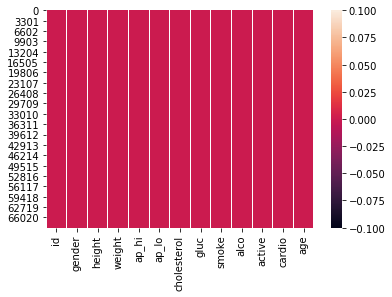

In [19]:
sns.heatmap(conc.isnull())

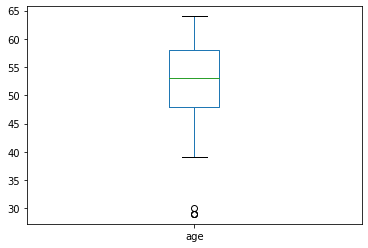

In [20]:
conc['age'].plot.box()

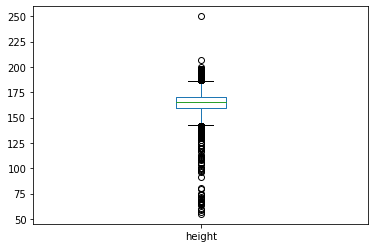

In [21]:
conc['height'].plot.box()

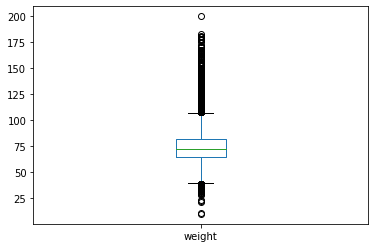

In [22]:
conc['weight'].plot.box()

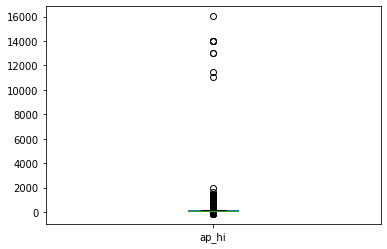

In [23]:
conc['ap_hi'].plot.box()

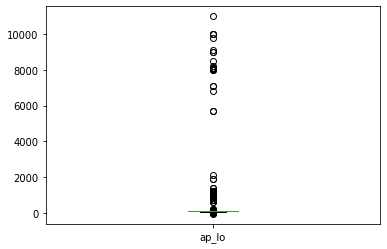

In [24]:
conc['ap_lo'].plot.box()

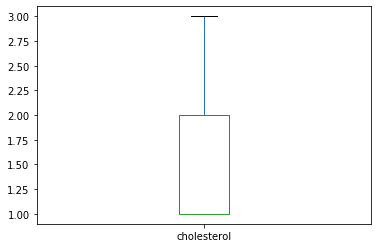

In [25]:
conc['cholesterol'].plot.box()

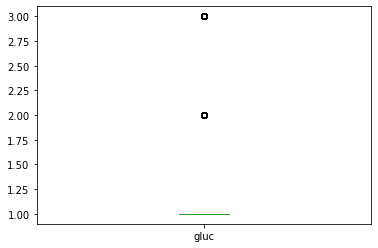

In [26]:
conc['gluc'].plot.box()

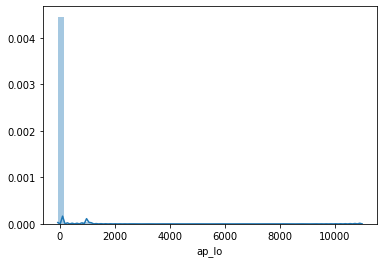

In [27]:
sns.distplot(conc['ap_lo'])

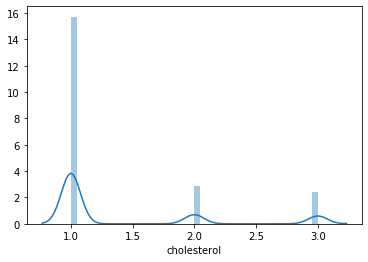

In [28]:
sns.distplot(conc['cholesterol'])

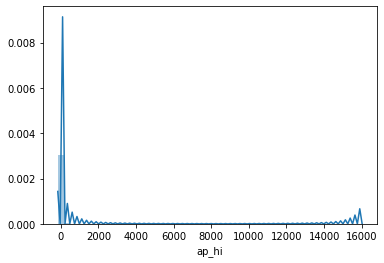

In [29]:
sns.distplot(conc['ap_hi'])

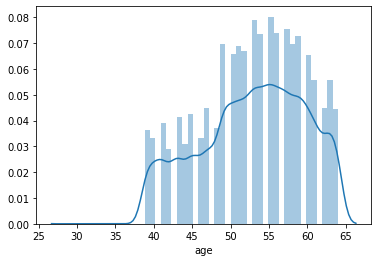

In [30]:
sns.distplot(conc['age'])

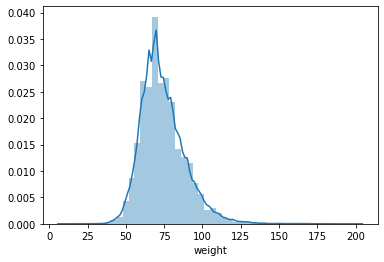

In [31]:
sns.distplot(conc['weight'])

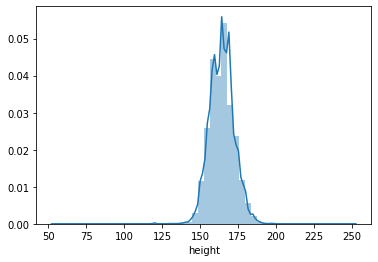

In [32]:
sns.distplot(conc['height'])

In [33]:
from scipy.stats import boxcox

In [34]:
conc['height']=boxcox(conc['height'],0)

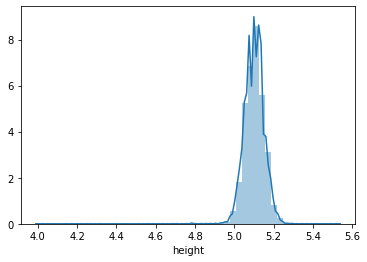

In [35]:
sns.distplot(conc['height'])

In [36]:
conc['weight']=boxcox(conc['weight'],0)

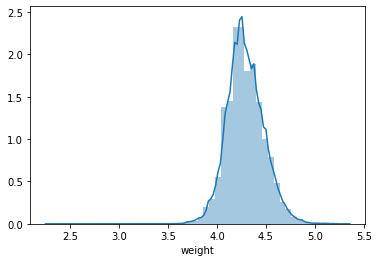

In [37]:
sns.distplot(conc['weight'])

In [38]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(conc))
print(z)

[[1.73243929 0.73302344 1.10785317 ... 0.49376463 0.99917784 1.20581624]
 [1.73240428 0.73302344 0.13566231 ... 0.49376463 1.00082284 1.89764614]
 [1.73236927 0.73302344 0.09992862 ... 0.49376463 0.99917784 1.05803232]
 ...
 [1.7338761  1.36421285 2.10014987 ... 2.02525646 1.00082284 0.12423906]
 [1.73394612 0.73302344 0.13566231 ... 2.02525646 1.00082284 1.20581624]
 [1.73398113 0.73302344 0.67663462 ... 0.49376463 0.99917784 0.46689663]]


In [39]:
threshold = 3
print(np.where(z > 3))

(array([    3,     3,    13, ..., 69286, 69296, 69298], dtype=int64), array([8, 9, 7, ..., 9, 8, 9], dtype=int64))


In [40]:
print(z[3][8])

3.2182442471147503


In [41]:
conc_c= conc[(z < 3).all(axis=1)]

In [42]:
conc.shape

(69301, 13)

In [43]:
conc_c.shape

(55323, 13)

In [44]:
conc_c.skew()

id            -0.002336
gender         0.896138
height         0.020273
weight         0.188496
ap_hi         -0.245626
ap_lo          4.702285
cholesterol    2.011736
gluc           3.188281
smoke          0.000000
alco           0.000000
active        -1.496599
cardio         0.055588
age           -0.287874
dtype: float64

In [45]:
conc=conc_c

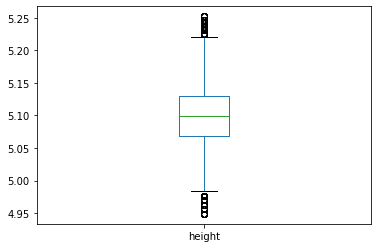

In [46]:
conc['height'].plot.box()

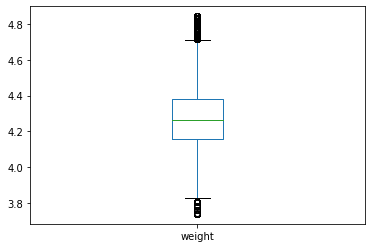

In [47]:
conc['weight'].plot.box()

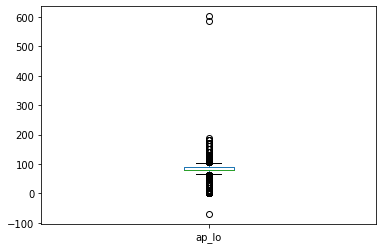

In [48]:
conc['ap_lo'].plot.box()

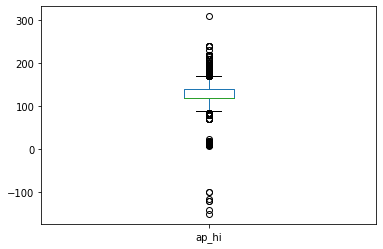

In [49]:
conc['ap_hi'].plot.box()

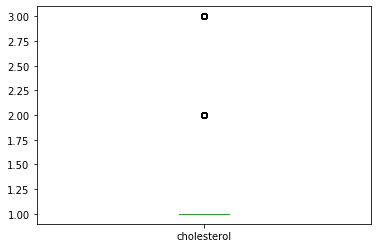

In [50]:
conc['cholesterol'].plot.box()

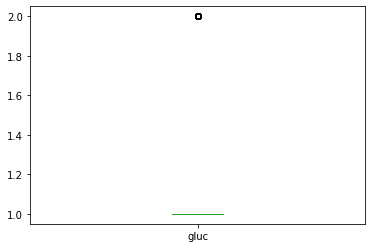

In [51]:
conc['gluc'].plot.box()

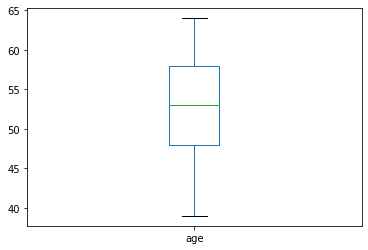

In [52]:
conc['age'].plot.box()

In [53]:
#sns.catplot(x='ap_lo',y='ap_hi',hue='gender',kind='bar',data=conc)

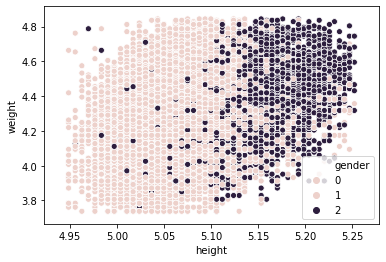

In [54]:
sns.scatterplot(x='height',y='weight',hue='gender',data=conc)

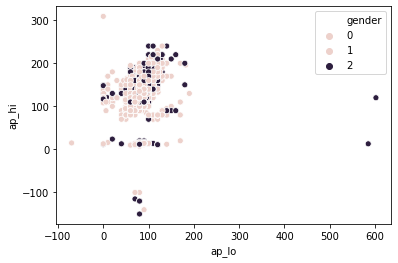

In [55]:
sns.scatterplot(x='ap_lo',y='ap_hi',hue='gender',data=conc)

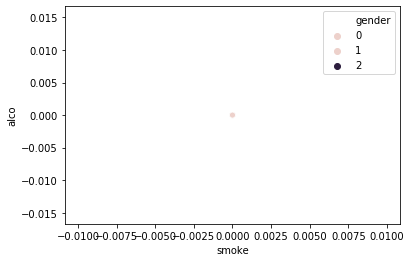

In [56]:
sns.scatterplot(x='smoke',y='alco',hue='gender',data=conc)

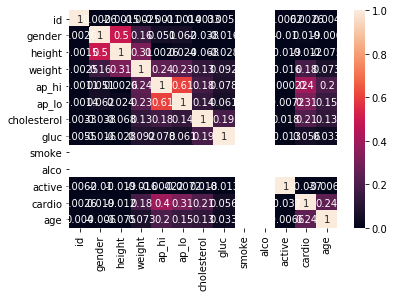

In [57]:
sns.heatmap(conc.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [58]:
conc.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
0,988,1,5.043425,4.234107,130,80,2,2,0,0,1,0,61
1,989,1,5.093750,4.262680,110,70,1,1,0,0,1,1,40
2,990,1,5.105945,4.248495,120,80,1,1,0,0,1,0,60
4,992,1,5.043425,4.127134,120,80,1,1,0,0,1,0,64
5,995,1,5.099866,4.110874,100,70,1,1,0,0,1,0,57


In [64]:
x=conc[['gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','age']].copy()
y=conc['cardio']

In [65]:
#y=conc['cardio']

In [66]:
x.shape

(55323, 11)

In [67]:
y.shape

(55323,)

In [68]:
y=y.values.reshape(-1,1)

In [69]:
y.shape

(55323, 1)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [71]:
x_train.shape

(38726, 11)

In [72]:
x_test.shape

(16597, 11)

In [73]:
y_train.shape

(38726, 1)

In [74]:
y_test.shape

(16597, 1)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lm=LogisticRegression()

In [77]:
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
lm.coef_

array([[ 0.11011733, -2.79518344,  0.90561871,  0.04633734,  0.02157508,
         0.49549895, -0.02923886,  0.        ,  0.        , -0.2470508 ,
         0.05407144]])

In [79]:
lm.intercept_

array([-0.61530538])

In [80]:
lm.score(x_train,y_train)

0.7265144863915716

In [81]:
pred=lm.predict(x_test)
print('predicate result:',pred)
print('actual price',y_test)

predicate result: [0 1 0 ... 1 0 0]
actual price [[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]


In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [83]:
print('error')
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))
print('rooot mean square error',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error: 0.2779417967102488
mean square error 0.2779417967102488
rooot mean square error 0.5272018557537984


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test, pred)

array([[6720, 1851],
       [2762, 5264]], dtype=int64)

In [87]:
score=cross_val_score(lm,x,y,cv=5,scoring='neg_mean_squared_error')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(lm,x,y,cv=5)
print('prediction \n',y_pred)


score of mean 
 -0.27536470876915775
score of standard devition 
 0.004469616383912478
prediction 
 [1 0 0 ... 1 1 1]


In [88]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
pred=gnb.predict(x_test)
print(' prediction \n',pred)
print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [0 1 0 ... 0 0 0]
accuracy score
 0.7028378622642646
confusion metrix
 [[7046 3407]
 [1525 4619]]
classification Report 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74     10453
           1       0.58      0.75      0.65      6144

    accuracy                           0.70     16597
   macro avg       0.70      0.71      0.70     16597
weighted avg       0.73      0.70      0.71     16597



In [90]:
score=cross_val_score(gnb,x,y,cv=5,scoring='accuracy')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(gnb,x,y,cv=5)
print('prediction \n',y_pred)
confu=confusion_matrix(y,y_pred)
print('confusion matrix \n',confu)

score of mean 
 0.700016261628927
score of standard devition 
 0.003768513707655014
prediction 
 [1 0 0 ... 1 1 1]
confusion matrix 
 [[23275  5155]
 [11441 15452]]


In [91]:
from sklearn.svm import SVC

In [92]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    print(' prediction \n',pred)
    print('accuracy score\n',accuracy_score(pred,y_test))
    print('confusion metrix\n',confusion_matrix(pred,y_test))
    print('classification Report \n',classification_report(pred,y_test))    

In [ ]:
svmkernel('poly')

In [ ]:
svmkernel('rbf')

In [ ]:
svmkernel('linear')

In [ ]:
def svmk(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')
    print('score of mean \n',score.mean())
    print('score of standard devition \n',score.std())
    y_pred=cross_val_predict(svc,x,y,cv=5)
    print('prediction \n',y_pred)
    confu=confusion_matrix(y,y_pred)
    print('confusion matrix \n',confu)

In [ ]:
svmk('poly')

In [ ]:
svmk('linear')

In [ ]:
svmk('rbf')

In [ ]:
from sklearn.model_selection import GridSearchCV
svc=SVC()

In [ ]:
param_grid ={'kernel':('linear', 'rbf','poly'), 'C':[1, 10]} 
svm_cv= GridSearchCV(svc, param_grid, cv = 5) 
svm_cv.fit(x, y) 
print("Tuned  Parameters: {}".format(svm_cv.best_params_))  
print("Best score is {}".format(svm_cv.best_score_)) 

In [ ]:
from sklearn.externals import joblib
joblib.dump(svc,'cardio.pkl')